# Data 602 Final project -- Mindy

## Sources and motivation

Dataset name: Crime Data from 2020 to Present (Los Angeles City Government public data)

https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/about_data

The reason I chose this crime collection is because I have always loved suspense and detective books and TV series, and I love the process of solving mysteries. I once even considered working as a forensic scientist or other jobs related to criminal investigation in the future. Although I was ultimately unable to realize this dream due to personal reasons, I still hope to continue working in this field in another way.

Therefore, when the opportunity arose to conduct a data analysis project, I chose the crime dataset as the subject.
If I can use known conditions to predict the development of a case through data analysis and thus help reduce the chances of a crime, it would be a disguised way of realizing my original dream.

## Main Question

Based on available information such as time of occurrence, location, victim characteristics, and the time gap between when the crime occurred and when it was reported, can we predict whether a crime case is likely to be solved (i.e., leading to arrest or case closure)? 
This will be formulated as a **binary classification** problem:  
- 1 = Case Solved  
- 0 = Case Unsolved

## Read data and preliminary review

In [1]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data, see the size of the data, and understand the general content of the data
df = pd.read_csv("Crime_Data_from_2020_to_Present.csv")
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,3/1/2020 0:00,3/1/2020 0:00,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,2/9/2020 0:00,2/8/2020 0:00,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 0:00,11/4/2020 0:00,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,5/10/2023 0:00,3/10/2020 0:00,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,9/9/2020 0:00,9/9/2020 0:00,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005194,250304203,2/20/2025 0:00,2/13/2025 0:00,2100,3,Southwest,325,1,522,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",...,IC,Invest Cont,522.0,NaN,NaN,NaN,2600 ELLENDALE PL,NaN,34.0307,-118.2923
1005195,250504051,1/14/2025 0:00,1/14/2025 0:00,1250,5,Harbor,509,1,210,ROBBERY,...,IC,Invest Cont,210.0,NaN,NaN,NaN,24300 WESTERN AV,NaN,33.8046,-118.3074
1005196,250304284,3/31/2025 0:00,3/30/2025 0:00,2100,3,Southwest,328,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,700 W 32ND ST,NaN,34.0242,-118.2805
1005197,251604136,2/27/2025 0:00,2/27/2025 0:00,1550,16,Foothill,1664,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,NaN,NaN,NaN,11900 SHELDON ST,NaN,34.2404,-118.3922


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005199 entries, 0 to 1005198
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1005199 non-null  int64  
 1   Date Rptd       1005199 non-null  object 
 2   DATE OCC        1005199 non-null  object 
 3   TIME OCC        1005199 non-null  int64  
 4   AREA            1005199 non-null  int64  
 5   AREA NAME       1005199 non-null  object 
 6   Rpt Dist No     1005199 non-null  int64  
 7   Part 1-2        1005199 non-null  int64  
 8   Crm Cd          1005199 non-null  int64  
 9   Crm Cd Desc     1005199 non-null  object 
 10  Mocodes         853440 non-null   object 
 11  Vict Age        1005199 non-null  int64  
 12  Vict Sex        860418 non-null   object 
 13  Vict Descent    860406 non-null   object 
 14  Premis Cd       1005183 non-null  float64
 15  Premis Desc     1004611 non-null  object 
 16  Weapon Used Cd  327282 non-null   fl

In [4]:
# Columns name
print(df.columns.tolist())

['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT', 'LON']


| Column Name | Definition |
|:---|:---|
| DR_NO | Record ID (Year + Area + Number) |
| Date Rptd | Date Reported |
| DATE OCC | Date Occurred |
| TIME OCC | Time Occurred (24-hour format) |
| AREA | Area Code (1-21) |
| AREA NAME | Area Name |
| Rpt Dist No | Reporting District Number |
| Part 1-2 | Part 1 or 2 Crime Classification |
| Crm Cd | Crime Code |
| Crm Cd Desc | Crime Description |
| Mocodes | Modus Operandi Codes |
| Vict Age | Victim Age |
| Vict Sex | Victim Sex |
| Vict Descent | Victim Descent |
| Premis Cd | Premises Code |
| Premis Desc | Premises Description |
| Weapon Used Cd | Weapon Used Code |
| Weapon Desc | Weapon Description |
| Status | Case Status Code |
| Status Desc | Case Status Description |
| Crm Cd 1 | Primary Crime Code |
| Crm Cd 2 | Secondary Crime Code |
| Crm Cd 3 | Third Crime Code |
| Crm Cd 4 | Fourth Crime Code |
| LOCATION | Approximate Street Address |
| Cross Street | Cross Street Name |
| LAT | atitude |
| LON | Longitude |

## Data Cleaning 

In [5]:
# View the number of missing values in each column
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Mocodes            151759
Vict Sex           144781
Vict Descent       144793
Premis Cd              16
Premis Desc           588
Weapon Used Cd     677917
Weapon Desc        677917
Status                  1
Crm Cd 1               11
Crm Cd 2           936040
Crm Cd 3          1002885
Crm Cd 4          1005135
Cross Street       850955
dtype: int64


| Feature | Missing Values | Planned Handling |
|:---|:---|:---|
| Mocodes | 151,759 | Ignore, not used as a feature for modeling, to detail |
| Vict Sex | 144,781 | Fill with "Unknown" (categorical encoding) |
| Vict Descent | 144,793 | Fill with "Unknown" (categorical encoding) |
| Premis Cd | 16 | Fill with -1 to indicate unknown |
| Premis Desc | 588 | Fill with "Unknown" |
| Weapon Used Cd | 677,917 | Fill with -1 to indicate unknown or dropped due to high missing rate and redundancy |
| Weapon Desc | 677,917 | Fill with "No Weapon" (categorical) or dropped |
| Status | 1 | Removed the only missing value|
| Crm Cd 1 | 11 | Either drop missing rows or fill with "Unknown" |
| Crm Cd 2 | 936,040 | Ignore, secondary crimes, not modeled |
| Crm Cd 3 | 1,002,885 | Ignore |
| Crm Cd 4 | 1,005,135 | Ignore |
| Cross Street | 850,955 | Feature dropped due to high missing rate |

### Create the target variable "is_solved"

In [6]:
df['Status'].value_counts()

IC    803835
AO    109325
AA     86916
JA      3249
JO      1867
CC         6
Name: Status, dtype: int64

In [7]:
df['Status Desc'].value_counts()

Invest Cont     803835
Adult Other     109325
Adult Arrest     86916
Juv Arrest        3249
Juv Other         1867
UNK                  7
Name: Status Desc, dtype: int64

In [8]:
# Create an is_solved column: Indicates whether the case is solved
solved_status = ['AO', 'JA', 'AA', 'JO']
df['is_solved'] = df['Status'].apply(lambda x: 1 if x in solved_status else 0)

# Check 
print(df['is_solved'].value_counts())

0    803842
1    201357
Name: is_solved, dtype: int64


The target variable `is_solved` was created based on the original `Status` field in the dataset, which indicates the current state of a case. The meaning of each status code is summarized below:

| Status Code | Meaning | Description | is_solved |
|:---|:---|:---|:---|
| IC (Invest Cont) | Investigation Continued | The case is still under investigation. | 0 (Unsolved) |
| AO (Adult Other) | Adult Other Disposition | Adult involved in the case, case closed through arrest or other disposition. | 1 (Solved) |
| AA (Adult Arrest) | Adult Arrest | Adult was arrested. | 1 (Solved) |
| JA (Juvenile Arrest) | Juvenile Arrest | Juvenile was arrested. | 1 (Solved) |
| JO (Juvenile Other) | Juvenile Other Disposition | Juvenile case handled through diversion or other disposition. | 1 (Solved) |
| XX (Unknown) | Unknown | Case status is unknown. Count under unsolved. | 0 (Unsolved) |

### Delete unused columns

In [9]:
columns_to_drop = ['Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street', 'LOCATION', 'DR_NO', 'Mocodes']
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,...,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,LAT,LON,is_solved
0,3/1/2020 0:00,3/1/2020 0:00,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,0,...,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,34.0375,-118.3506,1
1,2/9/2020 0:00,2/8/2020 0:00,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,47,...,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,34.0444,-118.2628,0
2,11/11/2020 0:00,11/4/2020 0:00,1700,3,Southwest,356,1,480,BIKE - STOLEN,19,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,34.0210,-118.3002,0
3,5/10/2023 0:00,3/10/2020 0:00,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,...,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,34.1576,-118.4387,0
4,9/9/2020 0:00,9/9/2020 0:00,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,0,...,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,34.0820,-118.2130,0


Feature : Reason for Removal
- Crm Cd 2, Crm Cd 3, Crm Cd 4 : Secondary crime codes with very high missing rates (>90%). They provide limited additional information compared to the primary crime code (Crm Cd 1). 
- Cross Street : More than 80% missing. The cross street name is difficult to encode meaningfully for classification and adds noise. 
- LOCATION : The dataset already provides precise latitude and longitude coordinates (`LAT` and `LON`), as well as administrative area information (`AREA` and `AREA NAME`). The `LOCATION` field only offers an anonymized street block address, which adds little additional predictive value. 
- DR_NO : Record ID number. It does not provide any predictive information for the target variable. 
- Mocodes : Modus operandi codes describing the method of crime commission. High missing rate (>15%) and overlapping information with crime type descriptions. 

### Format Conversion

In [10]:
# Date Rptd and DATE OCC to datetime format
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], errors='coerce')
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')

# Create new features: Year, Month, Weekday 
df['Occ_Year'] = df['DATE OCC'].dt.year
df['Occ_Month'] = df['DATE OCC'].dt.month
df['Occ_Weekday'] = df['DATE OCC'].dt.weekday  # 0=Monday, 6=Sunday

# TIME OCC to time format
df['TIME OCC'] = df['TIME OCC'].apply(lambda x: f"{int(x):04d}")

# Create a new complete crime time column (OCC_DATETIME)
df['OCC_DATETIME'] = pd.to_datetime(df['DATE OCC'].dt.strftime('%Y-%m-%d') + ' ' + df['TIME OCC'].str.slice(0,2) + ':' + df['TIME OCC'].str.slice(2,4), errors='coerce')

In [11]:
# Create a Time Period feature
def assign_time_period(hour):
    if 0 <= hour < 6:
        return 'Late Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Get the hours from OCC_DATETIME
df['Occ_Hour'] = df['OCC_DATETIME'].dt.hour
df['Time_Period'] = df['Occ_Hour'].apply(assign_time_period)

The division of hours into four main time periods (`Late Night`, `Morning`, `Afternoon`, `Evening`) follows common practices in crime pattern analysis. This categorization is designed to align with typical human activity cycles:

| Time Period | Hour Range | Description |
|:---|:---|:---|
| Late Night | 00:00 - 05:59 | Late night to early morning |
| Morning | 06:00 - 11:59 | Morning commuting and school hours |
| Afternoon | 12:00 - 17:59 | Afternoon activities |
| Evening | 18:00 - 23:59 | Evening and nighttime activities |

Sources 

- FBI Uniform Crime Reporting (UCR) Program: [https://ucr.fbi.gov/](https://ucr.fbi.gov/)
- Bureau of Justice Statistics, Crime Analysis Reports: [https://bjs.ojp.gov/content/pub/pdf/asc.pdf](https://bjs.ojp.gov/content/pub/pdf/asc.pdf)
- National Highway Traffic Safety Administration (NHTSA) Research Data: [https://www.nhtsa.gov/research-data](https://www.nhtsa.gov/research-data)

In [12]:
df.head()

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,...,Crm Cd 1,LAT,LON,is_solved,Occ_Year,Occ_Month,Occ_Weekday,OCC_DATETIME,Occ_Hour,Time_Period
0,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,0,...,510.0,34.0375,-118.3506,1,2020,3,6,2020-03-01 21:30:00,21,Evening
1,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,47,...,330.0,34.0444,-118.2628,0,2020,2,5,2020-02-08 18:00:00,18,Evening
2,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,19,...,480.0,34.0210,-118.3002,0,2020,11,2,2020-11-04 17:00:00,17,Afternoon
3,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,...,343.0,34.1576,-118.4387,0,2020,3,1,2020-03-10 20:37:00,20,Evening
4,2020-09-09,2020-09-09,0630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,0,...,510.0,34.0820,-118.2130,0,2020,9,2,2020-09-09 06:30:00,6,Morning


### EDA

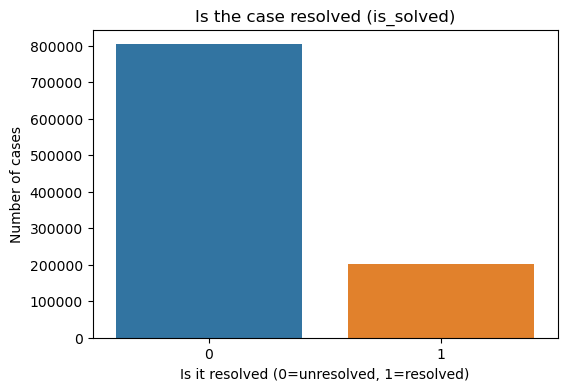

In [13]:
# Plot is_solved distribution
# Quickly understand the degree of data imbalance (because there are many more 0s than 1s)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='is_solved')
plt.title('Is the case resolved (is_solved)')
plt.xlabel('Is it resolved (0=unresolved, 1=resolved)')
plt.ylabel('Number of cases')
plt.show()

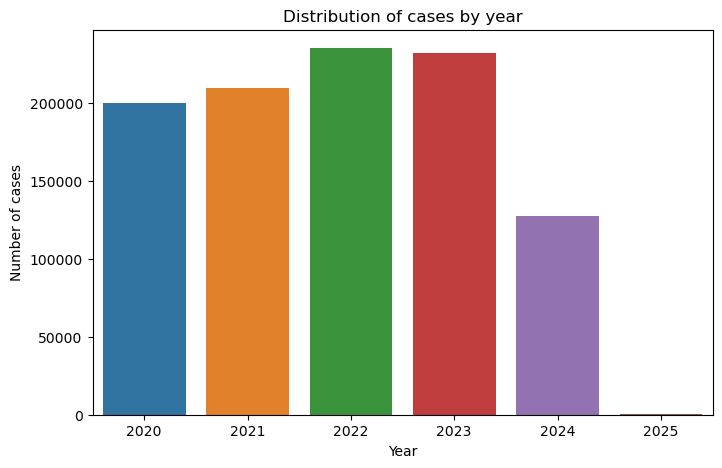

In [14]:
# Draw the distribution of the number of cases each year
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Occ_Year', order=sorted(df['Occ_Year'].dropna().unique()))
plt.title('Distribution of cases by year')
plt.xlabel('Year')
plt.ylabel('Number of cases')
plt.show()

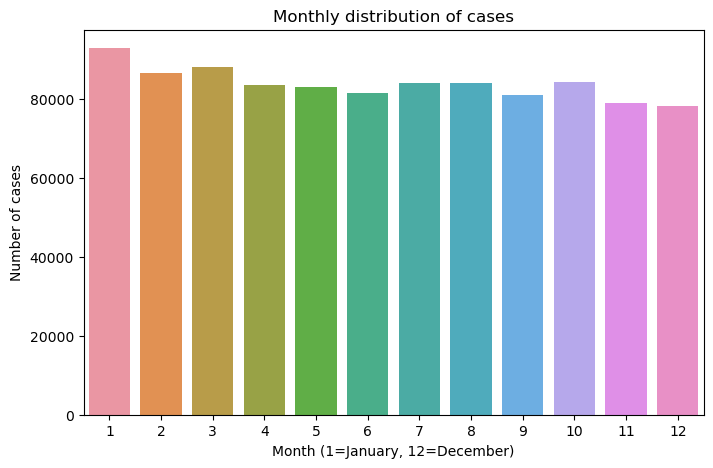

In [15]:
# Which months of the year have more or fewer cases?
# Occ_Month distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Occ_Month')
plt.title('Monthly distribution of cases')
plt.xlabel('Month (1=January, 12=December)')
plt.ylabel('Number of cases')
plt.show()

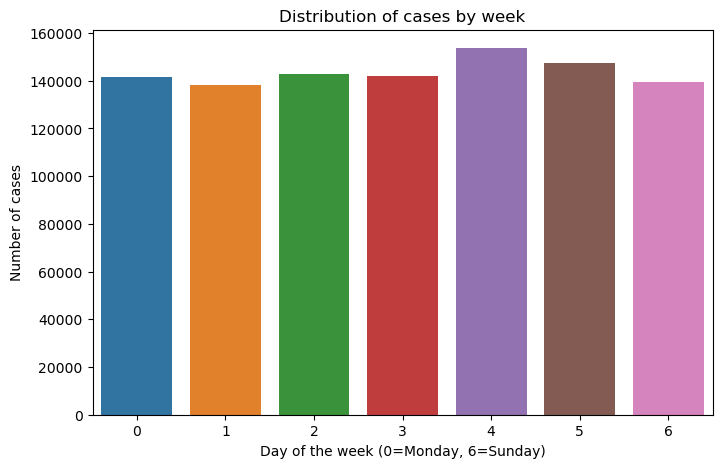

In [16]:
# Which day of the week has the most and least crime?
# Distribution of the day of the week when the crime occurred (Occ_Weekday)
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Occ_Weekday')
plt.title('Distribution of cases by week')
plt.xlabel('Day of the week (0=Monday, 6=Sunday)')
plt.ylabel('Number of cases')
plt.show()

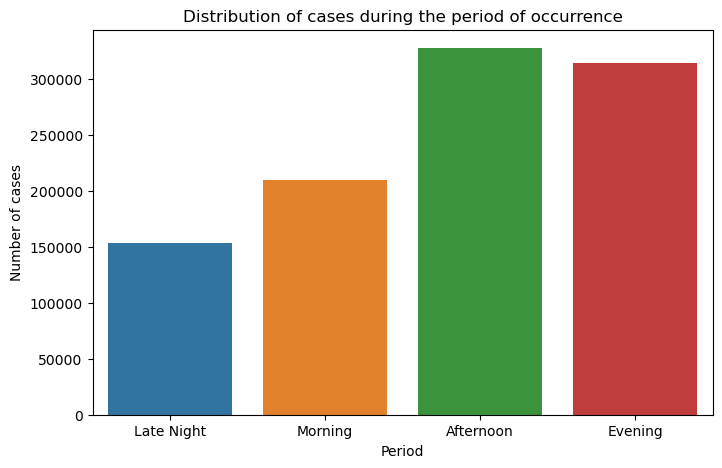

In [17]:
# Draw the distribution of the number of cases in each time period
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Time_Period', order=['Late Night', 'Morning', 'Afternoon', 'Evening'])
plt.title('Distribution of cases during the period of occurrence')
plt.xlabel('Period')
plt.ylabel('Number of cases')
plt.show()

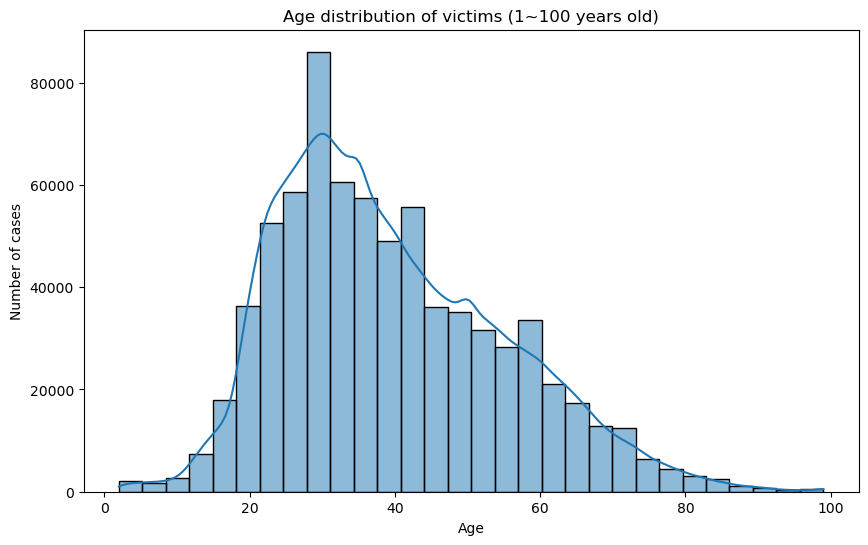

In [18]:
# The abnormal value range is set to >100. 
# It is not because people cannot live past 100, but because people older than this age are more likely to have accidents, 
# and the probability of calling the police when going out alone is low.
# As for those older than 0, there are more than 25,000 records with age 0, which is unreasonable. 
# It should be that those who did not specify their age should all be written as 0, so I decided to exclude 0 first.
# Filter out the victim's age within a reasonable range (1~100 years old)
plt.figure(figsize=(10,6))
sns.histplot(df[(df['Vict Age'] > 0) & (df['Vict Age'] <= 100)]['Vict Age'], bins=30, kde=True)
plt.title('Age distribution of victims (1~100 years old)')
plt.xlabel('Age')
plt.ylabel('Number of cases')
plt.show()

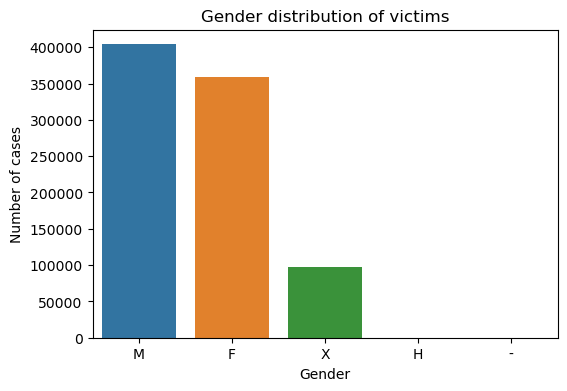

In [19]:
# Vict Sex Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Vict Sex', order=df['Vict Sex'].value_counts().index)
plt.title('Gender distribution of victims')
plt.xlabel('Gender')
plt.ylabel('Number of cases')
plt.show()

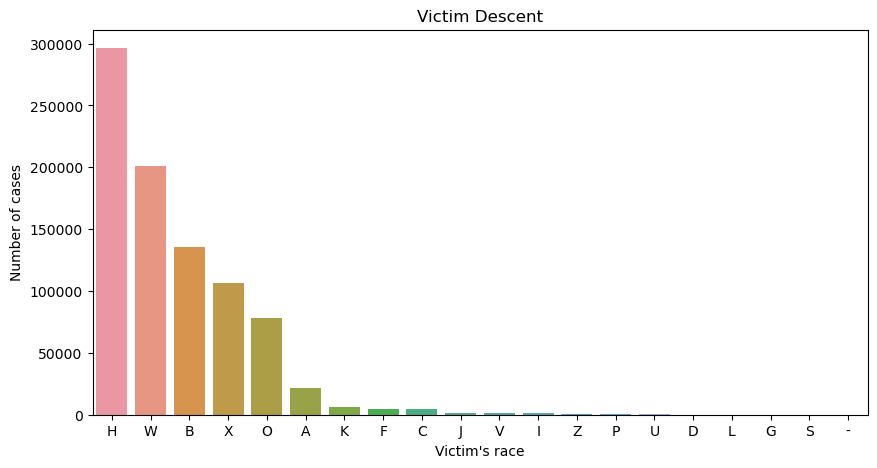

In [20]:
# Plot the distribution of cases by victim race (Vict Descent)
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Vict Descent', order=df['Vict Descent'].value_counts().index)
plt.title('Victim Descent')
plt.xlabel("Victim's race")
plt.ylabel('Number of cases')
plt.show()

Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

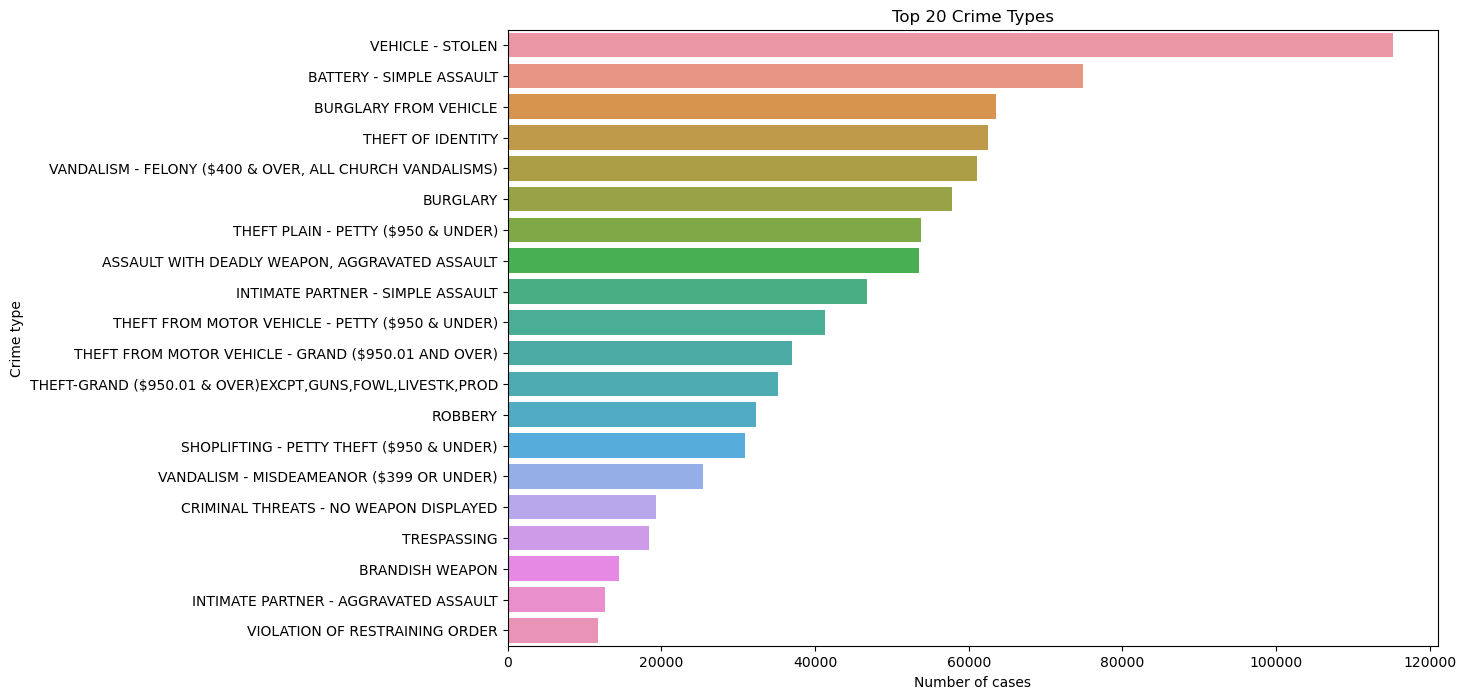

In [21]:
# Crime Type (Crm Cd Desc) Occurrence Frequency Top 20
plt.figure(figsize=(12,8))
top_crime_types = df['Crm Cd Desc'].value_counts().nlargest(20)
sns.barplot(x=top_crime_types.values, y=top_crime_types.index)
plt.title('Top 20 Crime Types')
plt.xlabel('Number of cases')
plt.ylabel('Crime type')
plt.show()

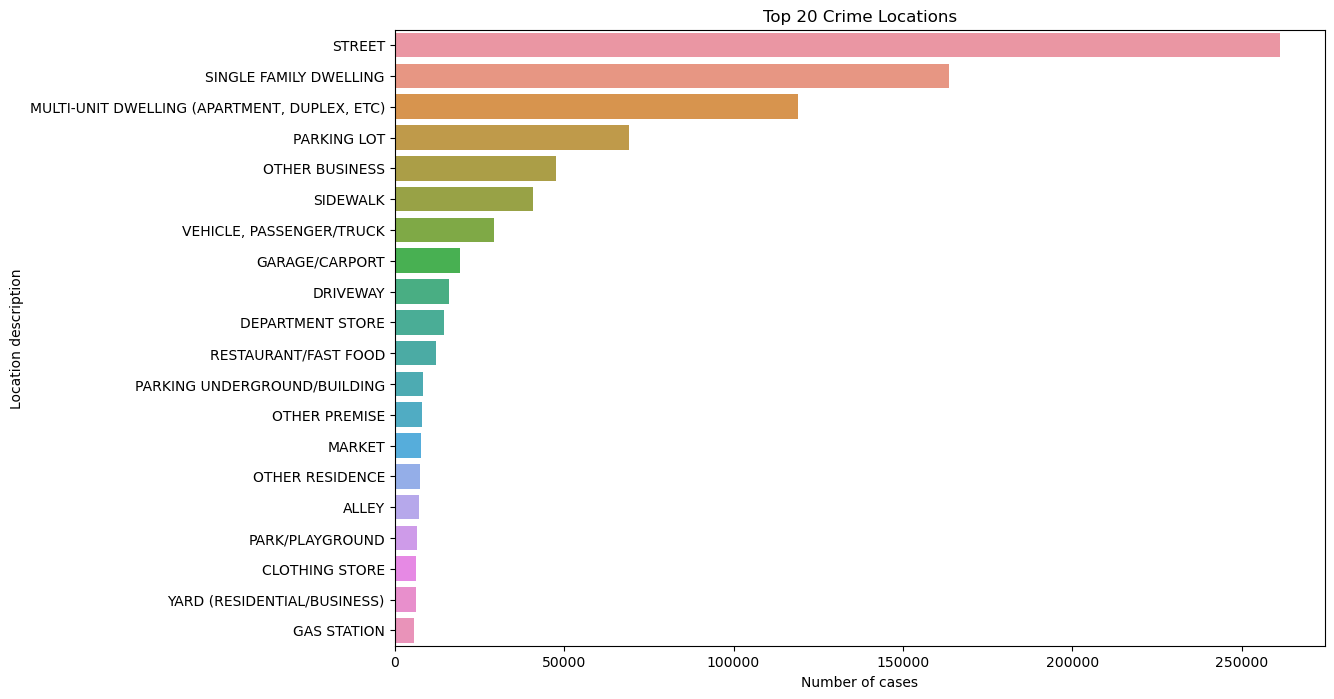

In [22]:
# Premis Desc Premis Desc Frequency Top 20
plt.figure(figsize=(12,8))
top_premises = df['Premis Desc'].value_counts().nlargest(20)
sns.barplot(x=top_premises.values, y=top_premises.index)
plt.title('Top 20 Crime Locations')
plt.xlabel('Number of cases')
plt.ylabel('Location description')
plt.show()

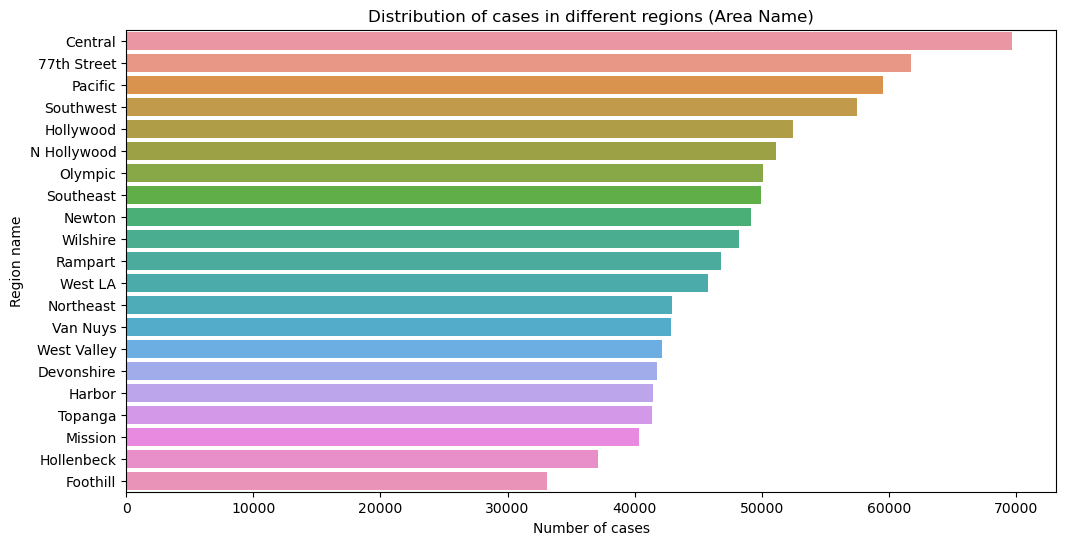

In [23]:
# Draw the distribution of the number of cases in different regions (AREA NAME)
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='AREA NAME', order=df['AREA NAME'].value_counts().index)
plt.title('Distribution of cases in different regions (Area Name)')
plt.xlabel('Number of cases')
plt.ylabel('Region name')
plt.show()

- Unnecessary features were removed, data types were corrected, and key temporal and categorical features were created (ex. Time Period, Occurrence Year). Handling plans for missing values were documented for future processing.
- I understand that professor emphasized removing redundant features. In this dataset, some features consist of a code and a corresponding description (ex. one-hot encoding + text description). I chose to retain both at this stage because it is more intuitive for data exploration, allowing me to directly interpret the meaning behind numerical codes. However, during the modeling phase, I will avoid using both simultaneously to prevent redundancy and potential data leakage.

### Analyze

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [25]:
# Create a column for the number of days to delay reporting a case: Report date - Occurrence date
df['Report_Delay_Days'] = (df['Date Rptd'] - df['DATE OCC']).dt.days
# Ensure delay is at least 0 days
df['Report_Delay_Days'] = df['Report_Delay_Days'].apply(lambda x: x if x >= 0 else np.nan)
df

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,...,LAT,LON,is_solved,Occ_Year,Occ_Month,Occ_Weekday,OCC_DATETIME,Occ_Hour,Time_Period,Report_Delay_Days
0,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,0,...,34.0375,-118.3506,1,2020,3,6,2020-03-01 21:30:00,21,Evening,0
1,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,47,...,34.0444,-118.2628,0,2020,2,5,2020-02-08 18:00:00,18,Evening,1
2,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,19,...,34.0210,-118.3002,0,2020,11,2,2020-11-04 17:00:00,17,Afternoon,7
3,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,...,34.1576,-118.4387,0,2020,3,1,2020-03-10 20:37:00,20,Evening,1156
4,2020-09-09,2020-09-09,0630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,0,...,34.0820,-118.2130,0,2020,9,2,2020-09-09 06:30:00,6,Morning,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005194,2025-02-20,2025-02-13,2100,3,Southwest,325,1,522,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",0,...,34.0307,-118.2923,0,2025,2,3,2025-02-13 21:00:00,21,Evening,7
1005195,2025-01-14,2025-01-14,1250,5,Harbor,509,1,210,ROBBERY,15,...,33.8046,-118.3074,0,2025,1,1,2025-01-14 12:50:00,12,Afternoon,0
1005196,2025-03-31,2025-03-30,2100,3,Southwest,328,1,510,VEHICLE - STOLEN,0,...,34.0242,-118.2805,0,2025,3,6,2025-03-30 21:00:00,21,Evening,1
1005197,2025-02-27,2025-02-27,1550,16,Foothill,1664,1,510,VEHICLE - STOLEN,0,...,34.2404,-118.3922,1,2025,2,3,2025-02-27 15:50:00,15,Afternoon,0


In [26]:
features = [
    'Occ_Year', 'Occ_Month', 'Occ_Weekday', 'Occ_Hour', 'Time_Period',
    'Vict Age', 'Vict Sex', 'Vict Descent', 'Crm Cd Desc', 'Premis Desc',
    'AREA NAME', 'Report_Delay_Days'
]
X = df[features]
y = df['is_solved']

numeric_features = ['Occ_Year', 'Occ_Month', 'Occ_Weekday','Occ_Hour', 'Vict Age', 'Report_Delay_Days']
categorical_features = ['Time_Period', 'Vict Sex', 'Vict Descent', 'Crm Cd Desc', 'Premis Desc', 'AREA NAME']

In [27]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [29]:
#  Logistic Regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [30]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # ROC curve

In [36]:
report = classification_report(y_test, y_pred, output_dict=True)
roc_auc = roc_auc_score(y_test, y_prob)

In [31]:
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.87      0.95      0.90    160769
           1       0.66      0.41      0.51     40271

    accuracy                           0.84    201040
   macro avg       0.76      0.68      0.71    201040
weighted avg       0.82      0.84      0.83    201040

ROC AUC Score: 0.849106715199851


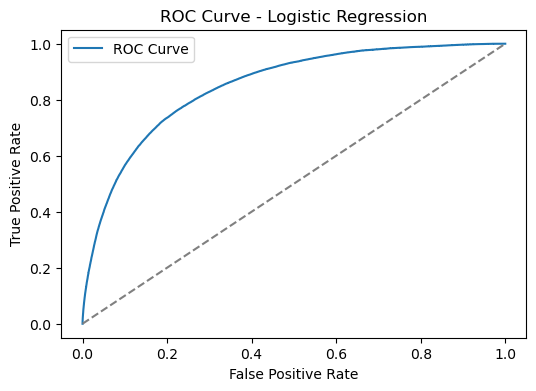

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

### Logistic Regression Performance 

The logistic regression model achieved an overall accuracy of **84%**, and an ROC AUC score of **0.85**, indicating strong overall discriminative ability between solved and unsolved crime cases.

The precision for predicting solved cases (class 1) is **66%**, meaning that two-thirds of predicted "solved" cases are correct.  
However, the recall for solved cases is only **41%**, which means the model is missing a significant number of actual solved cases.

The relatively high AUC score reflects good model ability across thresholds, but the imbalance between class recall suggests there is room to improve the model, especially in identifying solved cases.


In [33]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Building a Decision Tree pipeline
dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('classifier', DecisionTreeClassifier(random_state=42, max_depth=10))
])

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Building the Random Forest pipeline
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

In [37]:
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ],
    'Precision (class 1)': [
        report['1']['precision'],
        report_dt['1']['precision'],
        report_rf['1']['precision']
    ],
    'Recall (class 1)': [
        report['1']['recall'],
        report_dt['1']['recall'],
        report_rf['1']['recall']
    ],
    'F1-score (class 1)': [
        report['1']['f1-score'],
        report_dt['1']['f1-score'],
        report_rf['1']['f1-score']
    ],
    'ROC AUC': [
        roc_auc,
        roc_auc_dt,
        roc_auc_rf
    ]
})

comparison_df

,Model,Accuracy,Precision (class 1),Recall (class 1),F1-score (class 1),ROC AUC
0,Logistic Regression,0.840186,0.662593,0.411959,0.508046,0.849107
1,Decision Tree,0.833968,0.676827,0.327531,0.441440,0.773709
2,Random Forest,0.845001,0.679091,0.428894,0.525744,0.858369


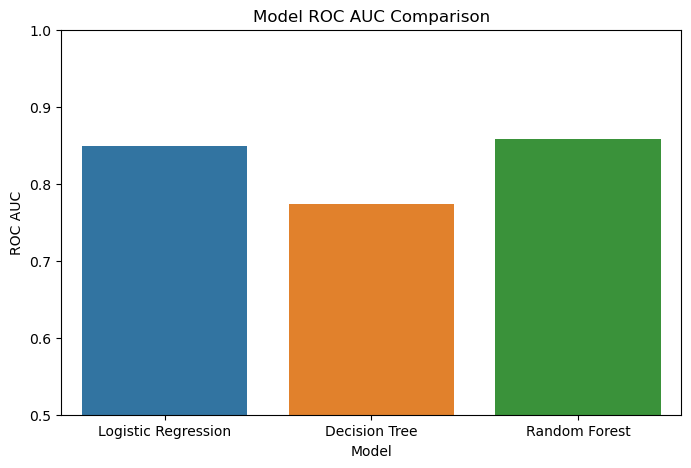

In [38]:
plt.figure(figsize=(8, 5))
sns.barplot(data=comparison_df, x='Model', y='ROC AUC')
plt.title('Model ROC AUC Comparison')
plt.ylim(0.5, 1.0)
plt.show()

### Final Model Comparison and Conclusion

We evaluated three different classification models to predict whether a crime case is likely to be solved:

| Model               | Accuracy | Precision (class 1) | Recall (class 1) | F1-score (class 1) | ROC AUC |
|--------------------|----------|----------------------|------------------|--------------------|---------|
| Logistic Regression| 0.840    | 0.663                | 0.412            | 0.508              | 0.849   |
| Decision Tree      | 0.834    | 0.677                | 0.328            | 0.441              | 0.774   |
| Random Forest      | 0.845    | 0.679                | 0.429            | 0.526              | 0.858   |

Based on the comparison:

- **Random Forest** achieved the best overall performance in terms of ROC AUC (0.858), F1-score (0.526), and recall.
- It demonstrates a better balance between precision and recall compared to the other models.
- **Logistic Regression** was a strong baseline, achieving high AUC but lower recall.
- **Decision Tree**, while interpretable, showed the weakest performance in both recall and AUC.

#### Final Model Selection:
**Random Forest** is selected as the final model due to its superior ability to distinguish solved from unsolved cases, particularly its higher recall and AUC.

---

### Next Steps for Improvement

- Perform hyperparameter tuning using GridSearchCV to improve the performance of Random Forest.
- Explore additional features, such as neighborhood-level crime statistics, socio-economic indicators, or public events.
- Address class imbalance using SMOTE or class-weight adjustments.
- Consider trying advanced ensemble methods such as XGBoost or LightGBM for further improvements.
